<a href="https://colab.research.google.com/github/Sampath2000/python-projects/blob/main/Student_marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Marks Prediction using linear regression


In [1]:
#import required packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from google.colab import files
uploaded=files.upload()

Saving student_info.csv to student_info.csv


In [3]:
marks=pd.read_csv('student_info.csv')
marks.head()

,hours,marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
marks.tail()

,hours,marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
marks.shape

(200, 2)

In [6]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   195 non-null    float64
 1   marks   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
marks.isnull().sum()

hours    5
marks    0
dtype: int64

In [8]:
marks.fillna(value=marks.hours.mean(),inplace=True)

In [9]:
marks.head()

,hours,marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [10]:
marks.describe()

,hours,marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000


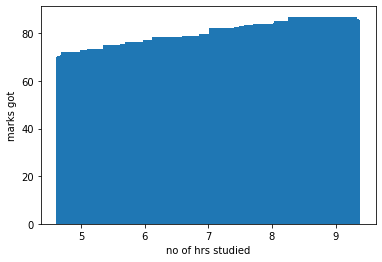

In [11]:
import matplotlib.pyplot as plt

plt.bar(marks.hours,marks.marks)
plt.xlabel("no of hrs studied")
plt.ylabel("marks got")
plt.show()

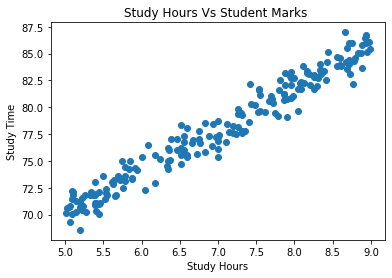

In [12]:
plt.scatter(marks.hours,marks.marks)
plt.xlabel("Study Hours")
plt.ylabel("Study Time")
plt.title("Study Hours Vs Student Marks ")
plt.show()

In [13]:
x=marks.drop(['marks'],axis=1)
y=marks['marks']

In [14]:
print(x)

        hours
0    6.830000
1    6.560000
2    6.995949
3    5.670000
4    8.670000
..        ...
195  7.530000
196  8.560000
197  8.940000
198  6.600000
199  8.350000

[200 rows x 1 columns]


In [15]:
print(y)

0      78.50
1      76.74
2      78.68
3      71.82
4      84.19
       ...  
195    81.67
196    84.68
197    86.75
198    78.05
199    83.50
Name: marks, Length: 200, dtype: float64


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(160, 1) (40, 1) (160,) (40,)


In [17]:
linear_regression=LinearRegression()
linear_regression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
m=linear_regression.coef_
c=linear_regression.intercept_
print(m)
print(c)

[3.87141669]
50.83451148538586


In [19]:
train_predict=linear_regression.predict(X_train)
print(train_predict)

[83.31569754 73.25001414 70.73359329 76.19229083 78.94099668 71.70144746
 76.07614833 72.66930164 73.48229914 71.12073496 77.91874414 79.13456752
 84.86426422 77.2762875  70.26902329 75.84386333 83.50926838 82.3091292
 83.43184005 80.99284753 76.231005   79.52170918 70.61745079 70.54002246
 71.97244663 73.13387164 84.55455089 81.41870336 81.76713087 79.13456752
 80.06370752 78.39899834 82.81241337 72.32087413 83.00598421 81.6122742
 78.66999751 71.93373247 82.23170087 71.8950183  70.92716412 72.20473163
 76.88914583 75.84386333 72.86287247 76.96657417 82.96727004 85.40626256
 71.6627333  70.38516579 77.81828584 72.28215997 80.64442003 81.99941587
 76.03743416 80.72184836 84.12869505 80.06370752 83.08341254 74.75986665
 78.32157001 71.93373247 70.54002246 84.70940755 85.21269172 75.45672166
 80.52827752 73.44358498 82.15427254 70.46259412 70.61745079 79.59913752
 77.624715   76.3471475  77.46985834 83.97383838 84.47712255 71.46916246
 85.40626256 75.49543582 82.4252717  76.96657417 70.7

In [20]:
r_error=metrics.r2_score(Y_train,train_predict)
print("R Squared Error :- ",r_error)

R Squared Error :-  0.9557225539605608


In [21]:
#Predicted values
test_data_predict=linear_regression.predict(X_test)
print(test_data_predict)

[71.27559163 79.13456752 84.12869505 85.44497673 70.92716412 76.61814666
 84.16740922 77.97314251 71.62401913 74.99215165 78.94099668 74.10172581
 81.65098837 73.25001414 81.2638467  71.04330663 74.41143915 72.78544414
 85.36754839 71.70144746 82.54141421 76.03743416 80.83799086 76.65686083
 84.36098005 79.09585335 75.53414999 77.91874414 81.6122742  73.59844164
 85.21269172 70.23030912 79.98627919 84.59326505 72.5918733  83.97383838
 84.39969422 75.41800749 82.81241337 85.48369089]


In [22]:
#Actual Values
print(Y_test.values)

[70.27 77.77 83.91 86.75 71.18 76.63 83.87 77.46 71.8  75.18 78.17 75.36
 83.33 73.14 80.72 70.4  76.48 71.82 86.41 70.9  83.08 75.52 79.5  76.99
 86.99 79.49 77.01 76.83 82.03 73.4  85.78 70.11 81.57 83.08 73.08 84.68
 84.19 74.97 81.7  85.15]


Text(0, 0.5, 'actual and predicted values')

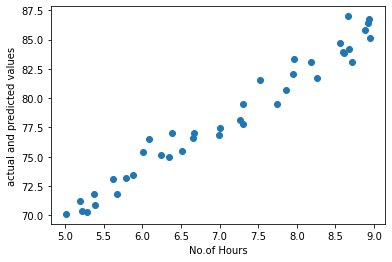

In [44]:
plt.scatter(X_test,Y_test)
plt.xlabel("No.of Hours")
plt.ylabel("actual and predicted values")

In [47]:
linear_regression.score(X_test,Y_test)

0.9645118422627417

In [43]:
linear_regression.predict([[5]])

array([70.19159495])

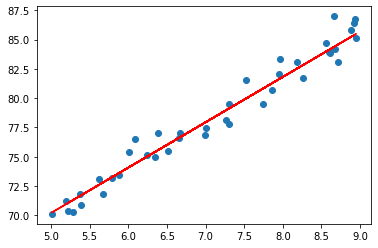

In [27]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,test_data_predict,color="red")

In [54]:
import joblib
joblib.dump(linear_regression,"Student_result_prediction.pkl")

['Student_result_prediction.pkl']

In [55]:
final_model=joblib.load("Student_result_prediction.pkl")

In [64]:
n=int(input("Enter the no of hours studied :- "))
if(final_model.predict([[n]])>100):
  print(100)
else:
  print(final_model.predict([[n]]))

Enter the no of hours studied :- 13
100
